In [65]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Оценка проведенных транзакций.


# 1. Загрузка данных

In [66]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"
data= pd.read_excel(url, sheet_name="Year 2009-2010")

Таблица содержит данные о более миллиона транзакций, произошедших и зарегистрированных в онлайн-розничной торговле в Великобритании, не связанной с магазинами, в период с 01.12.2009 по 01.12.2010. 
Для каждой транзакции указаны ее номер счета (если он начинается с буквы «c», это означает отмену транзакции), код товара (позиции), название товара (предмета), количество каждого продукта (позиции) за транзакцию, дата и время поступления, цена за единицу (в фунтах стерлингов), номер клиента (однозначно присваиваемое каждому покупателю) и название страны, в которой проживает покупатель.

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной транзакции) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [67]:
data.shape

(525461, 8)

Даже за один год данных слишком много. Возьмем первые 10 000 записей. (Вы сказали, что желательно не обрезать, а случайно взять. Однако в таком случае у меня нет гарантии, что попадутся оба класса. В противном случае классифицировать будет нечего.) Пробовал и миллион, и 100 000 - для ноутбука слишком (= 

In [68]:
data = data.drop(data.index[10000:])

In [69]:
data.shape

(10000, 8)

Отобразим первые строки таблицы:

In [70]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


А вот последние строки:

In [71]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9995,490149,21191,LARGE WHITE HONEYCOMB PAPER BELL,2,2009-12-04 09:43:00,4.30,NaN,United Kingdom
9996,490149,21192,WHITE BELL HONEYCOMB PAPER,4,2009-12-04 09:43:00,3.43,NaN,United Kingdom
9997,490149,21210,SET OF 72 RETRO SPOT PAPER DOILIES,3,2009-12-04 09:43:00,3.04,NaN,United Kingdom
9998,490149,21212,PACK OF 72 RETRO SPOT CAKE CASES,11,2009-12-04 09:43:00,1.30,NaN,United Kingdom
9999,490149,21213,PACK OF 72 SKULL CAKE CASES,2,2009-12-04 09:43:00,1.30,NaN,United Kingdom


Мы видим, что столбцы (признаки) имеют имена

- `Invoice` - номер счёта. (6-значное целое число, однозначно присваиваемое каждой транзакции. Если этот код начинается с буквы «С», это означает отмену.)
- `StockCode` - код товара (позиции).
- `Description` - название товара (предмета).
- `Quantity` - количество каждого продукта (позиции) за транзакцию.
- `InvoiceDate` - дата и время создания транзакции.
- `Price` - цена продукта за единицу в фунтах стерлингов (£).
- `Customer ID` - номер клиента (число, однозначно присваиваемое каждому покупателю).
- `Country` - название страны, в которой проживает покупатель.

Признаки `Quantity`, `Price`, `Customer ID` - числовые, признак `InvoiceDate` представим ниже как числовой, остальные признаки номинальные (категориальные).

Задача - определить, прошла ли транзакция или нет. Это *задача классификации*.

Имена столбцов (признаков) можно получить таким образом:

In [72]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

Имена строк (совпадают с номерами):

In [73]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', length=10000)

Столбцы 'Invoice', 'StockCode', 'Description' и 'Country' содержат категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [74]:
data['Invoice'].dtype

dtype('O')

In [75]:
data['Invoice'] = data['Invoice'].astype('category')

In [76]:
data['Invoice'].dtype

CategoricalDtype(categories=[   489434,    489435,    489436,    489437,    489438,
                     489439,    489440,    489441,    489442,    489443,
                  ...
                  'C490096', 'C490098', 'C490117', 'C490120', 'C490122',
                  'C490126', 'C490129', 'C490131', 'C490133', 'C490148'],
                 ordered=False)

In [77]:
data['StockCode'] = data['StockCode'].astype('category')

In [78]:
data['StockCode'].dtype

CategoricalDtype(categories=[     10002,      10080,      10109,      10120,      10125,
                       10133,      10134,      10135,      10138,      11001,
                  ...
                    '90214S',       'C2',        'D', 'DCGS0004', 'DCGS0058',
                  'DCGS0068', 'DCGS0076',      'DOT',        'M',     'POST'],
                 ordered=False)

In [79]:
data['Description'] = data['Description'].astype('category')

In [80]:
data['Description'].dtype

CategoricalDtype(categories=[                              21494,
                          ' 3 STRIPEY MICE FELTCRAFT',
                       ' BLACK PIRATE TREASURE CHEST',
                     ' BROWN  PIRATE TREASURE CHEST ',
                  ' CAMPHOR WOOD PORTOBELLO MUSHROOM',
                                   ' FLAMINGO LIGHTS',
                       ' HOME SWEET HOME  BLACKBOARD',
                        ' PEACE WOODEN BLOCK LETTERS',
                          ' RED/WHITE DOT MINI CASES',
                       ' RIDGED GLASS T-LIGHT HOLDER',
                  ...
                   'ZINC HEART LATTICE CHARGER LARGE',
                        'ZINC METAL HEART DECORATION',
                            'ZINC POLICE BOX LANTERN',
                   'ZINC WILLIE WINKIE  CANDLE STICK',
                                            'damages',
                                    'invcd as 84879?',
                                               'lost',
                                

In [81]:
data['Country'] = data['Country'].astype('category')

In [82]:
data['Country'].dtype

CategoricalDtype(categories=['Australia', 'Belgium', 'Channel Islands', 'Denmark', 'EIRE',
                  'France', 'Germany', 'Japan', 'Netherlands', 'Nigeria',
                  'Poland', 'Portugal', 'Spain', 'USA', 'United Kingdom'],
                 ordered=False)

Выше мы сказали, что 'InvoiceDate' - числовой признак.  Для этого переведем даты и время в секунды:

In [83]:
data['InvoiceDate'] = data['InvoiceDate'].map(lambda x: int(x.timestamp()))

In [84]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1259653500,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1259653500,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1259653500,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1259653500,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1259653500,1.25,13085.0,United Kingdom


# 2. Визуализация и вычисление числовых характеристик

Для начала построим общую диаграмму рассеивания.
Отрисовка всех точек требует много времени плюс наложение друг на друга. Поэтому изобразим только $1000$ случайных точек:

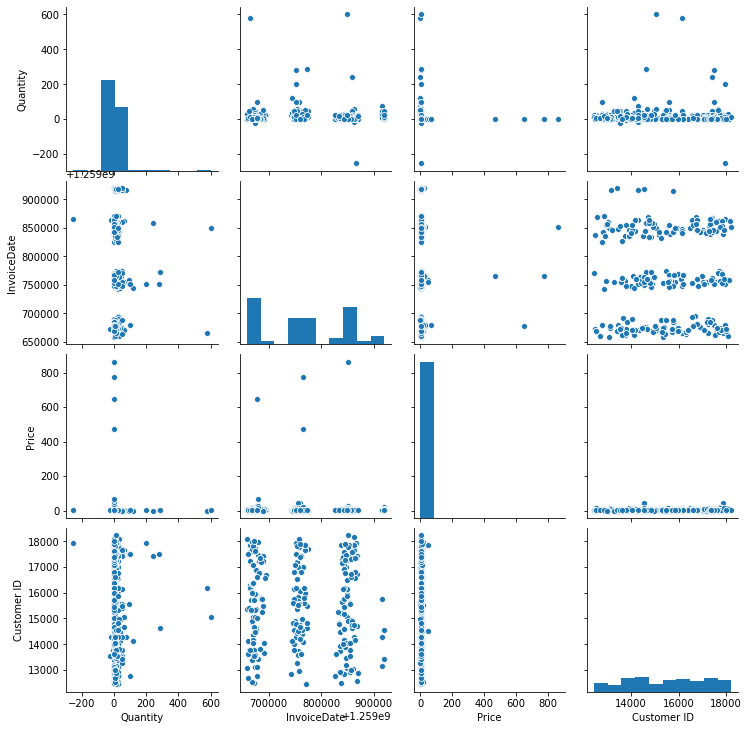

In [85]:
randomSubset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[randomSubset], diag_kind='hist')
pass

Из построенной диаграммы можно видеть следующее. 
1. Значения `Quantity`около нуля, за исключением выбросов.
2. Значения `InvoiceDate` делятся на 3 группы, за исключением выбросов.
3. Значения `Price` около нуля, за исключением выбросов.

In [86]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,10000.000000,1.000000e+04,10000.000000,7195.000000
mean,10.265500,1.259768e+09,4.430561,15488.444614
std,97.878045,7.796093e+04,26.527995,1590.150291
min,-1043.000000,1.259654e+09,0.000000,12362.000000
25%,1.000000,1.259678e+09,1.250000,14159.000000
50%,3.000000,1.259765e+09,2.570000,15581.000000
75%,8.000000,1.259846e+09,4.950000,16823.000000
max,5184.000000,1.259920e+09,1998.490000,18287.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.
Получим информацию о категориальных:

In [87]:
data.describe(include=['category'])

,Invoice,StockCode,Description,Country
count,10000,10000,9984,10000
unique,458,2129,2113,15
top,490074,22086,PAPER CHAIN KIT 50'S CHRISTMAS,United Kingdom
freq,580,69,69,9540


Матрица корреляции:

In [89]:
corr_mat = data.corr()
corr_mat

,Quantity,InvoiceDate,Price,Customer ID
Quantity,1.000000,0.019822,-0.010079,0.027155
InvoiceDate,0.019822,1.000000,0.009470,-0.037571
Price,-0.010079,0.009470,1.000000,-0.008221
Customer ID,0.027155,-0.037571,-0.008221,1.000000


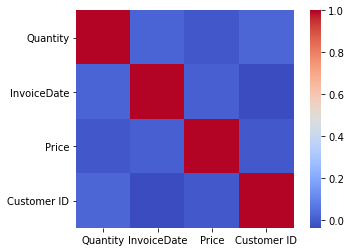

In [90]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

По матрице корреляции и её визуальному образу видно, что между числовыми признаками очень слабая связь, ведь все значения по модулю меньше 0.2.

# 3. Обработка пропущенных значений

 Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [91]:
data.isna().sum() 

Invoice           0
StockCode         0
Description      16
Quantity          0
InvoiceDate       0
Price             0
Customer ID    2805
Country           0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [92]:
data['Description'].fillna(data['Description'].mode().iloc[0], inplace=True)
data['Customer ID'    ].fillna(data['Customer ID'    ].mode().iloc[0], inplace=True)

In [93]:
data.isna().sum() 

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [94]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,10.265500,1.259768e+09,4.430561,15503.466900
std,97.878045,7.796093e+04,26.527995,1349.006973
min,-1043.000000,1.259654e+09,0.000000,12362.000000
25%,1.000000,1.259678e+09,1.250000,14654.000000
50%,3.000000,1.259765e+09,2.570000,15542.000000
75%,8.000000,1.259846e+09,4.950000,16200.000000
max,5184.000000,1.259920e+09,1998.490000,18287.000000


In [95]:
data.describe(include=['category'])

,Invoice,StockCode,Description,Country
count,10000,10000,10000,10000
unique,458,2129,2113,15
top,490074,22086,PAPER CHAIN KIT 50'S CHRISTMAS,United Kingdom
freq,580,69,85,9540


# 4. Обработка категориальных признаков

У нас есть 5 категориальных признака:`Invoice`, `StockCode`, `Description`, `Customer ID`, `Country`. Поэтому их вначале надо закодировать с помощью числовых принаков.

Основной признак `Invoice` для нашей задачи является бинарным. Поэтому заменим его на числовой:
Если признак `Invoice`начинается на`C...`(отмена транзакции), то 0, а иначе 1

In [96]:
temp = data['Invoice'] 
data['Invoice'] = data['Invoice'].astype('object')
for i in range(data['Invoice'].size):
    if isinstance(temp[i], int):
        data.at[i, 'Invoice'] = 1
    else:
        data.at[i, 'Invoice'] = 0

Остальные категориальные признаки не являются бинарными. Поэтому к ним нужно применять метод бинаризации. Начнем с `StockCode`.

In [97]:
 StockCode_dummies = pd.get_dummies(data['StockCode'])

In [98]:
 StockCode_dummies.head()

,10002,10080,10109,10120,10125,10133,10134,10135,10138,11001,...,90214S,C2,D,DCGS0004,DCGS0058,DCGS0068,DCGS0076,DOT,M,POST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Добавим эти dummy-столбцы к таблице и удалим столбец StockCode:

In [99]:
data = pd.concat((data, StockCode_dummies), axis=1)
data = data.drop(['StockCode'], axis=1)

In [100]:
data.head()

,Invoice,Description,Quantity,InvoiceDate,Price,Customer ID,Country,10002,10080,10109,...,90214S,C2,D,DCGS0004,DCGS0058,DCGS0068,DCGS0076,DOT,M,POST
0,1,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1259653500,6.95,13085.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,PINK CHERRY LIGHTS,12,1259653500,6.75,13085.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,WHITE CHERRY LIGHTS,12,1259653500,6.75,13085.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"RECORD FRAME 7"" SINGLE SIZE",48,1259653500,2.10,13085.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,STRAWBERRY CERAMIC TRINKET BOX,24,1259653500,1.25,13085.0,United Kingdom,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C признаками Customer ID, Country сделаем тоже самое. Очевидно, что успешность транзакции никак не зависит 'Description', поэтому уберем  его.

In [101]:
#с Customer ID
CustomerID_dummies = pd.get_dummies(data['Customer ID'])
data = pd.concat((data, CustomerID_dummies), axis=1)
data = data.drop(['Customer ID'], axis=1)

In [102]:
#с Country
Country_dummies = pd.get_dummies(data['Country'])
data = pd.concat((data, Country_dummies), axis=1)
data = data.drop(['Country'], axis=1)

In [103]:
#с Description
data = data.drop(['Description'], axis=1)

В итоге получаем:

In [104]:
data.head()

,Invoice,Quantity,InvoiceDate,Price,10002,10080,10109,10120,10125,10133,...,France,Germany,Japan,Netherlands,Nigeria,Poland,Portugal,Spain,USA,United Kingdom
0,1,12,1259653500,6.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,12,1259653500,6.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,12,1259653500,6.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,48,1259653500,2.10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,24,1259653500,1.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 5. Нормализация количественных признаков

Выполним стандартизацию всех признаков:

In [105]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [106]:
data_stand.describe()

,Quantity,InvoiceDate,Price,10002,10080,10109,10120,10125,10133,10134,...,France,Germany,Japan,Netherlands,Nigeria,Poland,Portugal,Spain,USA,United Kingdom
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-7.538706e-16,-1.387607e-12,2.182654e-15,2.174896e-15,6.345629e-16,2.475284e-16,7.681432e-16,9.277495e-16,1.858085e-15,-1.302534e-15,...,-2.472023e-16,5.120437e-15,1.205077e-15,-4.271507e-15,-1.985748e-16,-1.484160e-16,-5.174935e-15,-5.021483e-16,2.035969e-15,-1.898753e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.076100e+01,-1.464689e+00,-1.670145e-01,-2.450102e-02,-1.000000e-02,-1.000000e-02,-1.414284e-02,-1.732224e-02,-2.450102e-02,-1.414284e-02,...,-1.010051e-01,-7.016862e-02,-1.732224e-02,-4.801116e-02,-1.414284e-02,-4.695349e-02,-8.923066e-02,-1.414284e-02,-1.000000e-02,-4.553796e+00
25%,-9.466372e-02,-1.145299e+00,-1.198945e-01,-2.450102e-02,-1.000000e-02,-1.000000e-02,-1.414284e-02,-1.732224e-02,-2.450102e-02,-1.414284e-02,...,-1.010051e-01,-7.016862e-02,-1.732224e-02,-4.801116e-02,-1.414284e-02,-4.695349e-02,-8.923066e-02,-1.414284e-02,-1.000000e-02,2.195751e-01
50%,-7.423013e-02,-4.012956e-02,-7.013576e-02,-2.450102e-02,-1.000000e-02,-1.000000e-02,-1.414284e-02,-1.732224e-02,-2.450102e-02,-1.414284e-02,...,-1.010051e-01,-7.016862e-02,-1.732224e-02,-4.801116e-02,-1.414284e-02,-4.695349e-02,-8.923066e-02,-1.414284e-02,-1.000000e-02,2.195751e-01
75%,-2.314615e-02,1.001161e+00,1.958079e-02,-2.450102e-02,-1.000000e-02,-1.000000e-02,-1.414284e-02,-1.732224e-02,-2.450102e-02,-1.414284e-02,...,-1.010051e-01,-7.016862e-02,-1.732224e-02,-4.801116e-02,-1.414284e-02,-4.695349e-02,-8.923066e-02,-1.414284e-02,-1.000000e-02,2.195751e-01
max,5.285899e+01,1.950868e+00,7.516812e+01,4.081054e+01,9.999000e+01,9.999000e+01,7.070007e+01,5.772348e+01,4.081054e+01,7.070007e+01,...,9.899500e+00,1.424996e+01,5.772348e+01,2.082641e+01,7.070007e+01,2.129554e+01,1.120579e+01,7.070007e+01,9.999000e+01,2.195751e-01


# 6. Разбиение на выборки

In [107]:
# Готовим выборки для обучения
X = data_stand.drop('Invoice', axis = 1)
y = data_stand['Invoice']
feature_names = X.columns

In [108]:
type(feature_names)

pandas.core.indexes.base.Index

In [109]:
feature_names

Index([      'Quantity',    'InvoiceDate',          'Price',            10002,
                  10080,            10109,            10120,            10125,
                  10133,            10134,
       ...
               'France',        'Germany',          'Japan',    'Netherlands',
              'Nigeria',         'Poland',       'Portugal',          'Spain',
                  'USA', 'United Kingdom'],
      dtype='object', length=2468)

In [110]:
X = X.to_numpy()

In [111]:
y = np.array(y != -7.4924790862009445, dtype='int')

In [112]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7000 3000


# 7.1. Классификатор ближайших соседей

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10, n_jobs = -1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [115]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.01657142857142857 0.017333333333333333


По результатам можно сказать, ошибки довольно небольшие и есть небольшое переобучение.

# 7.2. Метод ближайших соседей с подгоном параметра

In [116]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 11, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier(algorithm = 'kd_tree',n_jobs = -1)
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10, n_jobs = -1)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.016142857142857125 3


In [117]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.012571428571428572 0.017


# Выводы:

1. И без подбора параметров, и с подбором параметров получились довольно небольшие ошибки.
2. В первом случае можно наблюдать небольшое переобучение, на тестовой выборке ошибка больше на 0,0008, чем на обучающей.
3. Во втором случае мы нашли более лучший параметр, при котором ошибка на обучающей выборке меньше, чем в первом случае. Однако тут переобучение побольше получается, около 0,0044.
4. Было бы замечательно проверить всё на больших объёмах данных, но моя машина не настолько производительная.

# Лабораторная работа №2

# PCA
Используем для сокращения размерности до 2.

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)

In [119]:
X_PCA

array([[-0.25925845,  0.23209958],
       [-0.32921105,  0.42728348],
       [-0.31889841,  0.46035236],
       ...,
       [-0.33150183, -0.10674367],
       [-0.32558435, -0.29868427],
       [-0.76449185, -0.41900526]])

Text(0.5, 1.0, 'Оставшиеся компоненты после РСА')

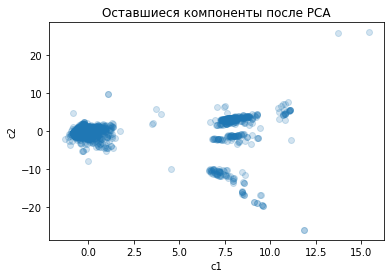

In [120]:
plt.scatter(X_PCA[:,0], X_PCA[:,1], alpha = .2)

plt.xlabel('c1')
plt.ylabel('c2')
plt.title('Оставшиеся компоненты после РСА')

# LDA
Используем для сокращения размерности до 2.

In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#т.к. у меня всего два класса, а по требованию: n_components cannot be larger than min(n_features, n_classes - 1)
#то n_components < 2, поэтому n_components=1
lda = LDA(n_components=1)
X_LDA = lda.fit_transform(X, y)

In [122]:
X_LDA

array([[ 0.47110485],
       [ 0.40458174],
       [-0.12024649],
       ...,
       [ 0.19987114],
       [ 0.29431053],
       [ 0.2297397 ]])

Вернемся к PCA...

# Используем kNN (k = 3)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7000 3000


In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("Train error: " + str(err_train)) 
print("Test error: " + str(err_test))

Train error: 0.014428571428571428
Test error: 0.019


Из прошлой лабы мы определили лучший метод kNN с 3 соседями. Поэтому применили его снова.
В итоге ошибки выросли:

на обуч.выборке на 0.001428571428571428, 
на тестовой - на 0.002666666666666666

Чтобы построить графики зависимости ошибки на выборках от количества главных компонент, необходимо посмотреть на результаты при разном количестве главных компонент.

Минимальное значение ошибки на обучающей выборке= 0.009 при кол-ве компонент: 10
Минимальное значение ошибки на тестовой выборке= 0.017333333333333333 при кол-ве компонент: 8


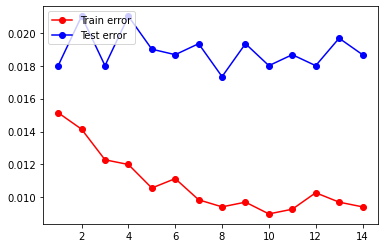

In [125]:
comp = range(1, 15, 1)
err_train_massiv = []
err_test_massiv = []
for i in comp:
    pca = PCA(n_components = i)
    X_PCA = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
    err_train_massiv.append(np.mean(knn.predict(X_train) != y_train))
    err_test_massiv.append(np.mean(knn.predict(X_test) != y_test))
plt.plot(comp, err_train_massiv, 'r-o', label = 'Train error')
plt.plot(comp, err_test_massiv,  'b-o', label = 'Test error')    
plt.legend(loc = 2)
#поиск лучшего количества компонент:
min_value_train = err_train_massiv[0]
arg_min_value_train = 1
min_value_test = err_test_massiv[0]
arg_min_value_test = 1
for i in range(len(err_train_massiv)):
    if (err_train_massiv[i ]< min_value_train):
        min_value_train = err_train_massiv[i]
        arg_min_value_train = i+1
    if (err_test_massiv[i ]< min_value_test):
        min_value_test = err_test_massiv[i]
        arg_min_value_test = i+1      

print("Минимальное значение ошибки на обучающей выборке= " + str(min_value_train) + " при кол-ве компонент: " +str(arg_min_value_train))
print("Минимальное значение ошибки на тестовой выборке= " + str(min_value_test) + " при кол-ве компонент: " +str(arg_min_value_test))

У нас в Х много признаков - 2468. Поэтому попробуем более большой шаг в увеличении главных компонент:

Минимальное значение ошибки на обучающей выборке= 0.008571428571428572 при кол-ве компонент: 201
Минимальное значение ошибки на тестовой выборке= 0.017 при кол-ве компонент: 51


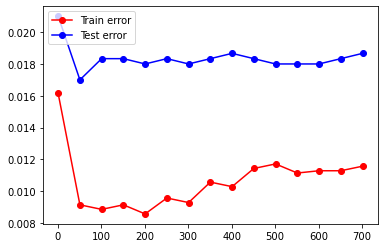

In [126]:
comp = range(1, 750, 50)
err_train_massiv = []
err_test_massiv = []
for i in comp:
    pca = PCA(n_components = i)
    X_PCA = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
    err_train_massiv.append(np.mean(knn.predict(X_train) != y_train))
    err_test_massiv.append(np.mean(knn.predict(X_test) != y_test))
    
plt.plot(comp, err_train_massiv, 'r-o', label = 'Train error')
plt.plot(comp, err_test_massiv,  'b-o', label = 'Test error')    
plt.legend(loc = 2)
#поиск лучшего количества компонент:
min_value_train = err_train_massiv[0]
arg_min_value_train = 1
min_value_test = err_test_massiv[0]
arg_min_value_test = 1
for i in range(len(err_train_massiv)):
    if (err_train_massiv[i ]< min_value_train):
        min_value_train = err_train_massiv[i]
        arg_min_value_train = i*50+1
    if (err_test_massiv[i ]< min_value_test):
        min_value_test = err_test_massiv[i]
        arg_min_value_test = i*50+1      

print("Минимальное значение ошибки на обучающей выборке= " + str(min_value_train) + " при кол-ве компонент: " +str(arg_min_value_train))
print("Минимальное значение ошибки на тестовой выборке= " + str(min_value_test) + " при кол-ве компонент: " +str(arg_min_value_test))

Найдем лучшее количество компонент:

Из графиков видно, что минимальная ошибка на обучающей выборке достиается при 201 компоненте, а минимальная ошибка на тестовой выборке достиается при 51 компоненте.
При дальнейшем увеличении компонент ошибки на выборках растут.



В итоге если объединить эти результаты с предыдущими (где мы запускали алгоритм на 1 и до 15 компонент), то можно увидеть, что минимальное значение ошибки на обучающей выборке было 0.009 при кол-ве компонент: 10, а минимальное значение ошибки на тестовой выборке было 0.017 при кол-ве компонент: 51

# Выводы:

До применения метода РСА метод kNN (k=3) сработал с ошибкой

на **обучающей выборке = 0.012571428571428572**, а на **тестовой выборке = 0.017**.

А после РСА метод kNN (k=3) сработал с минимальными ошибками:

**на обучающей выборке = 0.008571428571428572 при кол-ве компонент: 201**

**на тестовой выборке = 0.017 при кол-ве компонент: 51**

Таким образом, РСА не улучшил результат на тестовой выборке, она осталась прежней. С помощью РСА удалось подобрать оптимальное количество компонент, при котором можно уменьшить ошибку на обучающей выборке, но при этом ошибка на тестовой выборке будет больше минимальной. 

Вероятно, можно добиться лучших результатов при использовании других алгоритмов машинного обучения.